In [159]:
import pickle
import chromadb
import numpy as np
from tqdm.auto import tqdm
from pprint import pprint
from tqdm.auto import tqdm
import sys
from matplotlib import pyplot as plt
import random

sys.path.append("../")
from utils.parse_arxiv import *
from make_vectordb import get_embedding_model
%matplotlib inline


In [5]:
chroma_client = chromadb.PersistentClient(path="../data/chroma_dbs/")
chroma_client.list_collections()

[Collection(name=wiki-plot),
 Collection(name=wiki-plot-summary),
 Collection(name=arxiv_abstract),
 Collection(name=arxiv_title)]

In [6]:
coll_name = "arxiv_title"
collection = chroma_client.get_collection(name=coll_name)

In [7]:
with open("../data/filtered_data.pickle", "rb") as f:
    data = pickle.load(f)

In [11]:
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,cat_freq,journal_freq,date_freq
19,704.002,Patrick Roudeau,"The BABAR Collaboration, B. Aubert, et al",Measurement of the Hadronic Form Factor in D0 ...,"21 pages, 13 postscript figures, submitted to ...","Phys.Rev.D76:052005,2007",10.1103/PhysRevD.76.052005,"BABAR-PUB-07/015, SLAC-PUB-12417",hep-ex,None,The shape of the hadronic form factor f+(q2)...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2015-06-30,"[[The BABAR Collaboration, , ], [Aubert, B., ]]",17311,2.0,536
2032,704.2033,Anwar Shiekh Dr.,A.Y. Shiekh,The Quantum Interference Computer: an experime...,"6 pages, 1 figure","Int. Jour. of Theo. Phys., 47, 2176, 2008",10.1007/s10773-008-9664-7,None,quant-ph,None,An experiment is proposed to test the interf...,"[{'version': 'v1', 'created': 'Mon, 16 Apr 200...",2009-11-13,"[[Shiekh, A. Y., ]]",66088,2.0,25981
2087,704.2088,Shimul Akhanjee,Shimul Akhanjee,Exact longitudinal plasmon dispersion relation...,"4 pages, 1 figure. Important typos and errors ...","Phys. Rev. B 76, 165129 (2007)",10.1103/PhysRevB.76.165129,None,cond-mat.str-el,None,We derive the exact longitudinal plasmon dis...,"[{'version': 'v1', 'created': 'Tue, 17 Apr 200...",2011-11-09,"[[Akhanjee, Shimul, ]]",25554,2.0,992
2109,704.211,Ekkehard Kruger,"Ekkehard Kr\""uger",Stability of the superconducting state in YBa_...,None,"J. Supercond. Nov. Magn. 23 , 213 (2010)",10.1007/s10948-009-0518-1,None,cond-mat.supr-con,None,The nonadiabatic Heisenberg model (NHM) prop...,"[{'version': 'v1', 'created': 'Tue, 17 Apr 200...",2011-03-03,"[[Krüger, Ekkehard, ]]",16424,2.0,211
2976,704.2977,Kostya Trachenko,Kostya Trachenko and Vadim Brazhkin,Liquid elasticity length and universal dynamic...,None,"J. Phys.: Condens. Matter 20, 075103 (2008)",10.1088/0953-8984/20/7/075103,None,cond-mat.dis-nn,None,We discuss two main universal dynamic crosso...,"[{'version': 'v1', 'created': 'Mon, 23 Apr 200...",2015-05-13,"[[Trachenko, Kostya, ], [Brazhkin, Vadim, ]]",4078,2.0,10119


In [48]:
def aggregate_by_keywords(data):
    author_dict = {}
    cat_dict = {}
    journal_dict = {}
    year_dict = {}
    
    for i in tqdm(range(data.shape[0])):
        # parse authors
        authors = parse_authors(data['authors'].iloc[i])
        for author in authors:
            if author not in author_dict.keys():
                author_dict[author] = [i]
            else:
                author_dict[author].append(i)
                
        # parse journals
        journals = parse_journal(data['journal-ref'].iloc[i])
        if journals not in journal_dict.keys():
            journal_dict[journals] = [i]
        else:
            journal_dict[journals].append(i)
            
        # parse categories
        categories = parse_categories(data['categories'].iloc[i])
        for cat in categories:
            if cat not in cat_dict.keys():
                cat_dict[cat] = [i]
            else:
                cat_dict[cat].append(i)

        # parse year
        year = parse_year(data['update_date'].iloc[i])
        if year not in year_dict.keys():
            year_dict[year] = [i]
        else:
            year_dict[year].append(i)
    return author_dict, cat_dict, journal_dict, year_dict

In [49]:
author_dict, cat_dict, journal_dict, year_dict = aggregate_by_keywords(data)
for k in year_dict.keys():
    print(k, year_dict[k])

  0%|          | 0/12926 [00:00<?, ?it/s]

2015 [0, 4, 68, 102, 379, 545, 552, 645, 652, 667, 693, 712, 718, 729, 738, 744, 763, 791, 896, 910, 946, 980, 985, 986, 1013, 1014, 1016, 1027, 1030, 1031, 1085, 1088, 1090, 1094, 1121, 1122, 1124, 1165, 1166, 1177, 1179, 1180, 1182, 1187, 1205, 1206, 1207, 1212, 1222, 1223, 1224, 1225, 1228, 1234, 1242, 1253, 1254, 1256, 1262, 1267, 1269, 1272, 1277, 1278, 1292, 1310, 1320, 1323, 1326, 1328, 1348, 1353, 1356, 1362, 1365, 1369, 1372, 1381, 1382, 1383, 1384, 1410, 1420, 1423, 1424, 1425, 1427, 1432, 1439, 1454, 1455, 1460, 1462, 1466, 1469, 1488, 1499, 1509, 1512, 1526, 1532, 1533, 1535, 1538, 1539, 1548, 1557, 1563, 1569, 1572, 1588, 1594, 1598, 1610, 1623, 1626, 1630, 1633, 1638, 1666, 1668, 1669, 1699, 1735, 1740, 1756, 1757, 1758, 1759, 1766, 1773, 1785, 1790, 1791, 1813, 1817, 1821, 1844, 1845, 1850, 1866, 1871, 1876, 1877, 1879, 1880, 1882, 1888, 1889, 1891, 1893, 1899, 1903, 1905, 1908, 1912, 1913, 1914, 1917, 1922, 1923, 1925, 1931, 1936, 1939, 1940, 1941, 1942, 1943, 1946, 194

In [50]:
for k in author_dict.keys():
    print(k, len(author_dict[k]))

TheBABARCollaboration 6
B.Aubert 5
etal 15
A.Y.Shiekh 2
ShimulAkhanjee 1
EkkehardKr\"uger 3
KostyaTrachenkoandVadimBrazhkin 1
Y.Onose 2
LuLi 1
C.PetrovicandN.P.Ong 1
DiederikAerts 3
F\'elixMajou(IRCCyN) 2
PhilippeWenger(IRCCyN) 12
DamienChablat(IRCCyN) 15
St\'ephaneCaro(IRCCyN) 3
JorgeAngeles(CIM) 2
MaherBaili(IRCCyN) 2
AnatolyPashkevich(RoboticLaboratory) 1
MazenZein(IRCCyN) 2
DanielKanaan(IRCCyN) 1
NathanSmith 2
A.LeccardiandS.Molendi 1
TomasoBelloni(INAF-OsservatorioAstronomicodiBrera 1
Merate 1
Italy) 9
E.A.Leicht 1
GavinClarkson 1
KerbyShedden 1
andM.E.J.Newman 1
GangMu 5
YueWang 4
LeiShanandHai-HuWen 1
E.J.Koop 2
A.I.Lerescu 2
J.Liu 2
B.J.vanWees 2
D.Reuter 2
A.D.Wieck 2
C.H.vanderWal 2
N.P.OngandC.Petrovic 1
PabloPiantanidaandPierreDuhamel 1
C.A.Ryan 1
O.Moussa 1
J.BaughandR.Laflamme 1
AdolfoAvella 1
FerdinandoMancini 1
S.Turgut 2
TobiasGanzowandSashaRubin 1
PetarPopovskiandHiroyukiYomo 1
JohnP.Perdew 2
AdriennRuzsinszky 2
GaborI.Csonka 2
OlegA.Vydrov 2
GustavoE.Scuseria 2
Lucia

In [51]:
def add_test_groups(test_groups, target_dict):
    for k in target_dict.keys():
        if len(target_dict[k]) > 1:
            test_groups.append(target_dict[k])
    return test_groups

In [52]:
test_groups = []
test_groups = add_test_groups(test_groups, author_dict)
test_groups = add_test_groups(test_groups, cat_dict)
test_groups = add_test_groups(test_groups, journal_dict)
test_groups = add_test_groups(test_groups, year_dict)

In [184]:
freq = {}
for group in test_groups:
    group_len = len(group)
    if group_len not in freq:
        freq[group_len] = 1
    else:
        freq[group_len] += 1

In [186]:
for k in freq.keys():
    print(k, freq[k])

6 332
5 652
15 9
2 8531
3 1908
12 13
9 52
4 918
19 4
11 37
7 391
8 88
16 6
13 11
17 11
23 5
14 8
10 25
48 4
47 1
32 2
31 1
44 2
27 4
134 2
534 1
334 3
181 2
70 2
67 1
544 1
123 2
97 2
204 1
481 1
55 3
376 1
52 3
573 2
191 1
46 2
56 4
59 2
37 3
140 1
245 1
202 1
111 2
50 1
184 1
1019 1
346 1
223 1
24 3
35 3
42 1
193 1
451 1
20 5
33 4
102 1
136 1
66 2
43 2
29 3
133 1
2320 1
91 4
38 1
291 1
312 1
289 2
177 1
125 1
148 1
118 1
18 4
137 1
192 1
104 2
1743 1
733 1
210 1
76 1
79 1
127 2
83 2
203 1
93 1
131 1
166 1
68 1
61 1
328 1
164 1
36 2
114 1
915 1
107 1
34 1
45 1
30 1
162 1
273 1
381 1
331 1
208 1
39 1
22 3
128 1
41 1
49 1
77 1
26 4
25 2
73 1
28 2
21 4
272 1
340 1
305 1
394 1
183 1
302 1
347 1
229 1
635 1
2100 1
108 1
1827 1
1843 1
1522 1
2088 1
250 1


In [94]:
cfg = load_json('../config/arxiv_cfg.json')

Loaded from ../config/arxiv_cfg.json


In [60]:
embed_func = get_embedding_model(cfg['vectorDB'])


Invalid embedding model: all-MiniLM-L6-v2
Using default model: all-MiniLM-L6-v2


In [82]:
def embed_all(df, embed_func):
    test_embeddings = []
    gt_embeddings = []
    for i in tqdm(range(df.shape[0])):
        test_embeddings.append(embed_func([df['title'].iloc[i]])[0])
        gt_embeddings.append(embed_func([df['abstract'].iloc[i]])[0])
    return test_embeddings, gt_embeddings

In [83]:
test_embeddings, gt_embeddings = embed_all(data, embed_func)

  0%|          | 0/12926 [00:00<?, ?it/s]

In [84]:
test_embeddings = np.array(test_embeddings)
gt_embeddings = np.array(gt_embeddings)

In [85]:
test_arr = [
    [1, 1, 2], 
    [2, 2, 4],
    [3, 3, 6]
]

In [101]:
def row_var(arr):
    return np.sum(np.var(arr, axis=0))

In [102]:
print(row_var(test_arr))

4.0


In [118]:
def calc_group_vars(test_embeddings, gt_embeddings, test_groups):
    test_vars = []
    gt_vars = []
    for group in test_groups:
        test_vars.append(row_var(test_embeddings[group]))
        gt_vars.append(row_var(gt_embeddings[group]))
    return test_vars, gt_vars

In [167]:
test_vars, gt_vars = calc_group_vars(test_embeddings, gt_embeddings, test_groups)

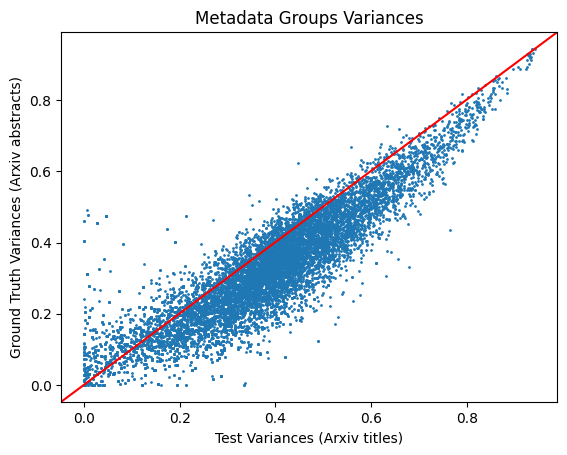

In [169]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'r', transform=ax.transAxes)
ax.scatter(test_vars, gt_vars, s=1)
ax.set_xlabel('Test Variances (Arxiv titles)')
ax.set_ylabel('Ground Truth Variances (Arxiv abstracts)')
ax.set_title("Metadata Groups Variances")
fig.savefig('../data/metadata_vars.png')

In [158]:
test_vars = row_var(test_embeddings)
gt_vars = row_var(gt_embeddings)
print(test_vars, gt_vars)

0.9392274694384277 0.9256964115630884


In [161]:
print(test_embeddings.shape)
print(gt_embeddings.shape)

(12926, 384)
(12926, 384)


In [178]:
def rand_sample(test_embeddings, gt_embeddings, n, group_size):
    sample_groups = []
    for i in range(n):
        sample_groups.append(random.sample(range(test_embeddings.shape[0]), group_size))
    test_vars, gt_vars = calc_group_vars(test_embeddings, gt_embeddings, sample_groups)
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r', transform=ax.transAxes)
    ax.scatter(test_vars, gt_vars, s=1)
    ax.set_xlabel('Test Variances (Arxiv titles)')
    ax.set_ylabel('Ground Truth Variances (Arxiv abstracts)')
    ax.set_title("Random Sample Variances")
    fig.savefig('../data/rand_vars.png')

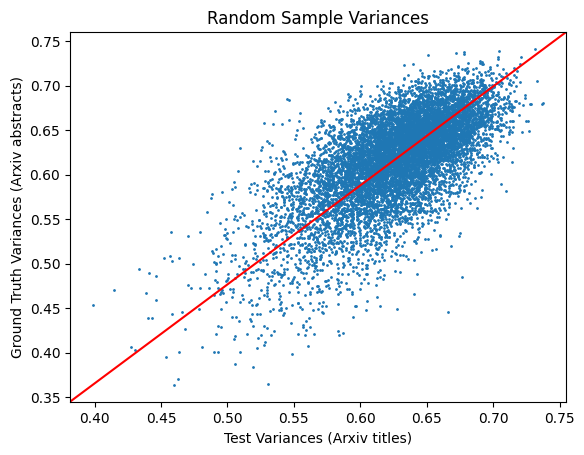

In [182]:
rand_sample(test_embeddings, gt_embeddings, 10000, 3)